In [82]:
import pandas as pd
from math import sqrt
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime 
from pandas import Series
%matpllotlib inline
import warnings
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

UsageError: Line magic function `%matpllotlib` not found.


Here, the time series analysis is being performed on Reliance stock price of last three years.

In [34]:
data = pdr.get_data_yahoo('RELIANCE.NS', datetime.date.today() - datetime.timedelta(1095),datetime.date.today() - datetime.timedelta(15))

The data ha been imported from yahoo finance. The last 10 days data can be seen in the table below. The data had been imported till 9th of July 2020. 

In [40]:
data.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-26,1752.000000,1717.000000,1728.800049,1741.650024,14270458.0,1735.134888
2020-06-29,1739.750000,1715.550049,1728.050049,1723.150024,11824524.0,1716.704102
2020-06-30,1741.000000,1695.550049,1737.000000,1704.099976,13972563.0,1697.725342
2020-07-01,1749.000000,1708.050049,1720.000000,1737.599976,13136179.0,1731.099976
2020-07-02,1767.599976,1735.050049,1743.000000,1760.349976,13286365.0,1760.349976
2020-07-03,1793.000000,1768.000000,1779.800049,1787.900024,13583909.0,1787.900024
2020-07-06,1858.000000,1792.099976,1805.000000,1851.800049,21697962.0,1851.800049
2020-07-07,1864.349976,1806.300049,1860.000000,1823.449951,16239990.0,1823.449951
2020-07-08,1834.949951,1790.000000,1824.050049,1798.000000,12093186.0,1798.000000


In [36]:
data.index

DatetimeIndex(['2017-07-25', '2017-07-26', '2017-07-27', '2017-07-28',
               '2017-07-31', '2017-08-01', '2017-08-02', '2017-08-03',
               '2017-08-04', '2017-08-07',
               ...
               '2020-06-26', '2020-06-29', '2020-06-30', '2020-07-01',
               '2020-07-02', '2020-07-03', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09'],
              dtype='datetime64[ns]', name='Date', length=726, freq=None)

In [37]:
data.shape

(726, 6)

In this time seres analysis, we are going to use ARIMA Model for analysing the data and predicting future price. The adjacent close has been taken as the price for anaysing and predicting. Train is the dataframe on which the model is to be trained.

In [46]:
train.tail()

Date
2020-06-11    1531.947754
2020-06-12    1582.856689
2020-06-15    1608.510376
2020-06-16    1611.648438
2020-06-17    1609.307251
Name: Adj Close, dtype: float64

Valid is the dataframe on which the model is to be tested.

In [50]:
valid = data['Adj Close'].iloc[695:]

In [51]:
valid.tail()

Date
2020-07-03    1787.900024
2020-07-06    1851.800049
2020-07-07    1823.449951
2020-07-08    1798.000000
2020-07-09    1824.250000
Name: Adj Close, dtype: float64

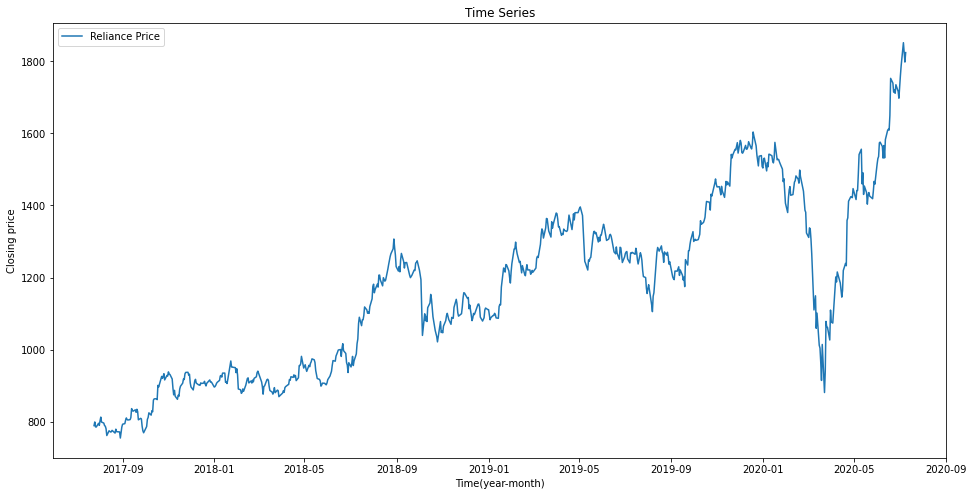

In [52]:
ts = data['Adj Close'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Reliance Price') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Closing price") 
plt.legend(loc='best')

The graph represents the price fluctuations from september 2017 to july 2020.

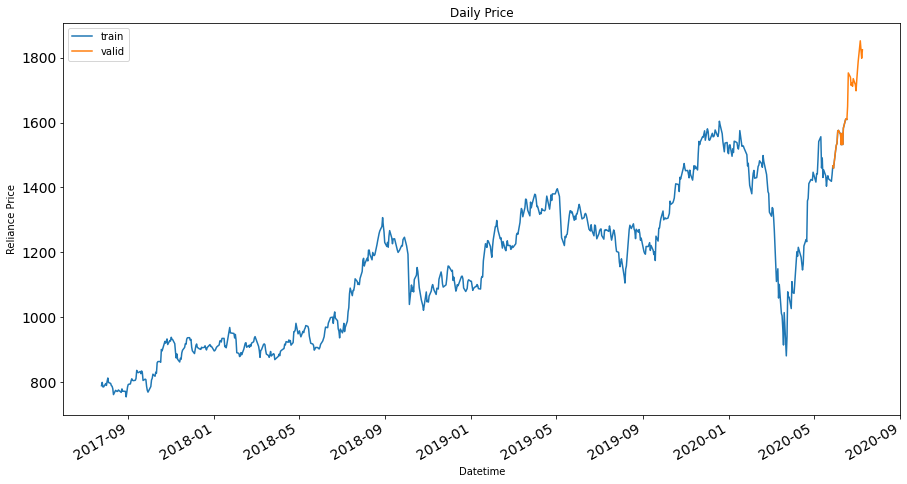

In [53]:
train.plot(figsize=(15,8), title= 'Daily Price', fontsize=14, label='train')
valid.plot(figsize=(15,8), title= 'Daily Price', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Reliance Price") 
plt.legend(loc='best') 
plt.show()

Next, Dickey Fuller test is being done to check the stationarity of the series.The intuition behind this test is that it determines how strongly a time series is defined by a trend. 

So, the hypothesis has been defined.
The null hypothesis of the test is that time series is not stationary (has some time-dependent structure).
The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.


The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

The bellow function calculates the results of Dickey-Fuller test.

In [62]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = timeseries.rolling(10).mean() # 24 hours on each day
    rolstd = timeseries.rolling(10).std()
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    #     print(dftest)
#{'1%': -3.430708525404171, '5%': -2.861698454786869, '10%': -2.5668543412994906}
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
#         print('Critical Value (%s): ' %key, value)
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

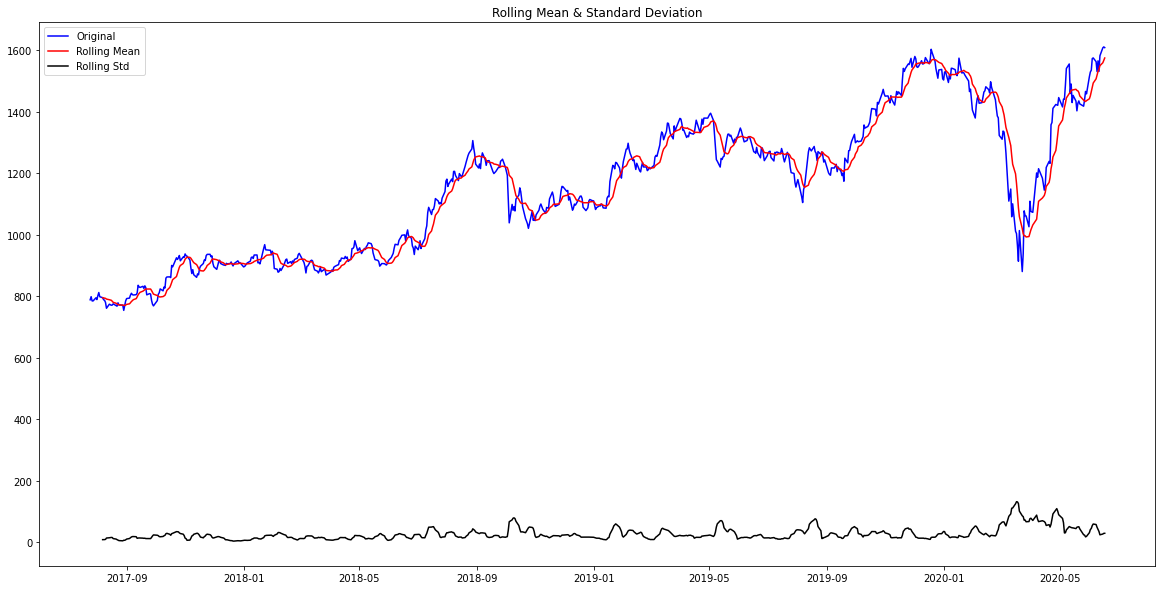

Results of Dickey-Fuller Test:
Test Statistic                  -1.424122
p-value                          0.570659
#Lags Used                      11.000000
Number of Observations Used    698.000000
Critical Value (1%)             -3.439753
Critical Value (5%)             -2.865690
Critical Value (10%)            -2.568980
dtype: float64


In [63]:
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(train)

We interpret this result using the Test Statistics and critical value. If the Test Statistics is smaller than critical value, it suggests we reject the null hypothesis (stationary), otherwise a greater Test Statistics suggests we accept the null hypothesis (non-stationary).

Here, in the above case, the Test Statistic is greater than critical values. So null hypothesis has been accepted. The series is not stationary.

So, firstly we will try to make the data stationary

A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. We see an increasing trend in the data so we can apply transformation which penalizes higher values more than smaller ones, for example log transformation.

Rolling average is used here to remove the trend.

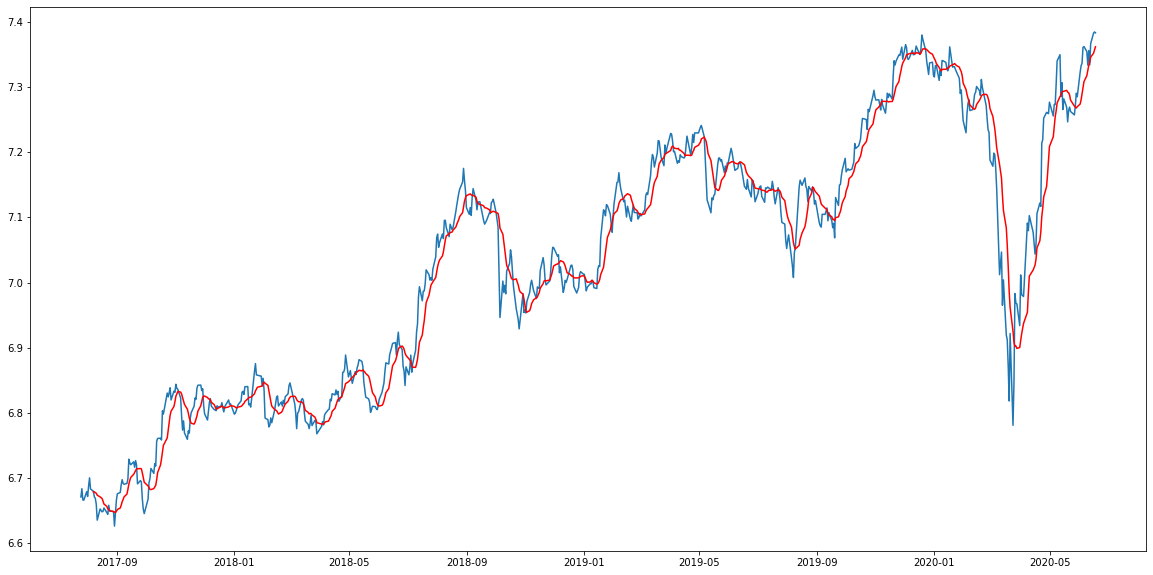

In [64]:
Train_log = np.log(train) 
valid_log = np.log(valid)
moving_avg = Train_log.rolling(10).mean()
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 

# plt.plot(df_log, 'green', label='Train data')
# plt.plot(test_data, 'blue', label='Test data')
# plt.show()

As increasing trend is being observed here, this is to be removed to make the series more stationary.

In [60]:
train_log_moving_avg_diff = Train_log - moving_avg
train_log_moving_avg_diff

Date
2017-07-25         NaN
2017-07-26         NaN
2017-07-27         NaN
2017-07-28         NaN
2017-07-31         NaN
                ...   
2020-06-11   -0.003857
2020-06-12    0.020681
2020-06-15    0.030747
2020-06-16    0.027494
2020-06-17    0.021371
Name: Adj Close, Length: 710, dtype: float64

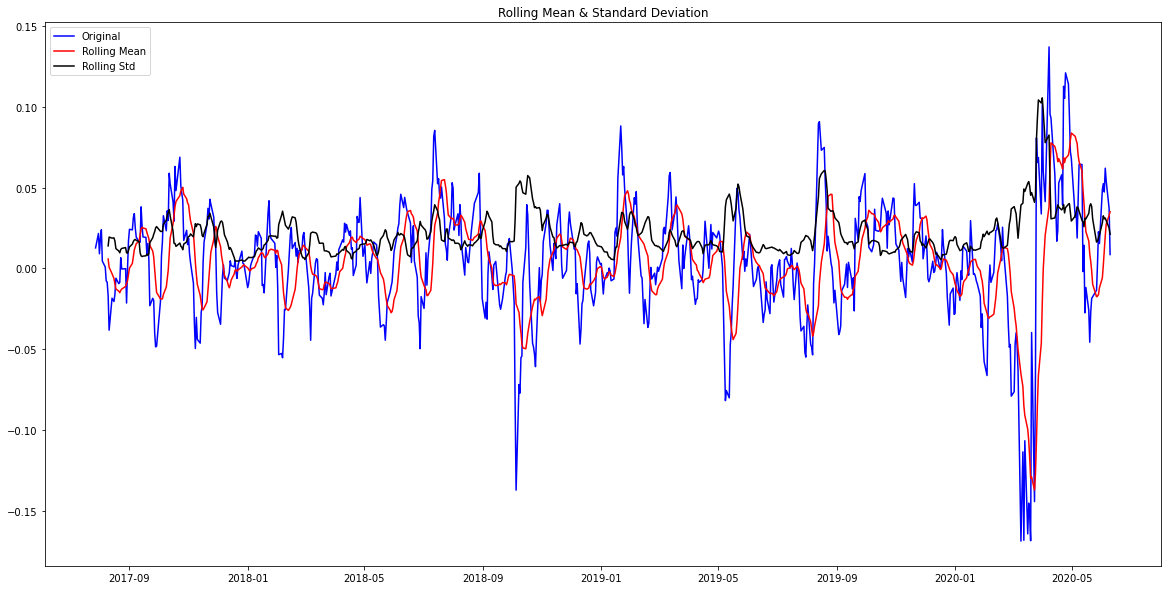

Results of Dickey-Fuller Test:
Test Statistic                -6.350255e+00
p-value                        2.621565e-08
#Lags Used                     1.100000e+01
Number of Observations Used    6.890000e+02
Critical Value (1%)           -3.439877e+00
Critical Value (5%)           -2.865744e+00
Critical Value (10%)          -2.569009e+00
dtype: float64


In [93]:
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)


Since Test Statistic is very smaller as compare to critical values hence the trend is completely removed.


Now, mean of the time series have to be stabilised which is also a requirement for a stationary time series. Differencing can help to make the series stable and eliminate the trend.

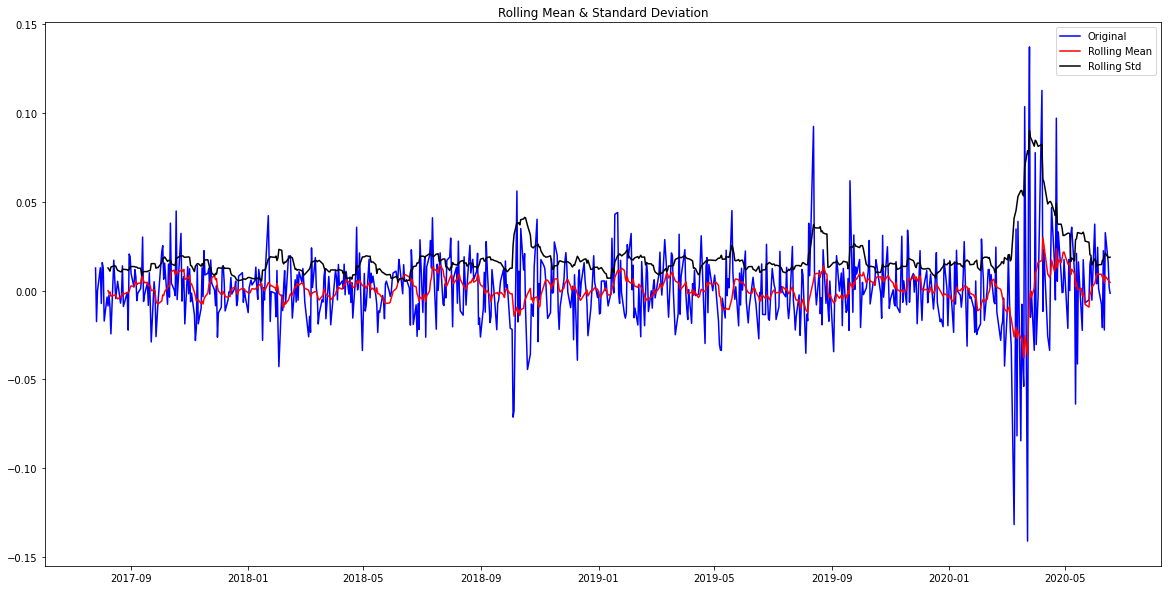

Results of Dickey-Fuller Test:
Test Statistic                -7.887213e+00
p-value                        4.535945e-12
#Lags Used                     1.000000e+01
Number of Observations Used    6.980000e+02
Critical Value (1%)           -3.439753e+00
Critical Value (5%)           -2.865690e+00
Critical Value (10%)          -2.568980e+00
dtype: float64


In [67]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())


Now the time series is to be decomposed into trend and seasonality and the residual will be obtained which is the random variation in the series


By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).

Seasonality is always of a fixed and known period.

seasonal decompose is being used to decompose the time series into trend, seasonality and residuals.


In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).values, freq = 10) 

In [96]:
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

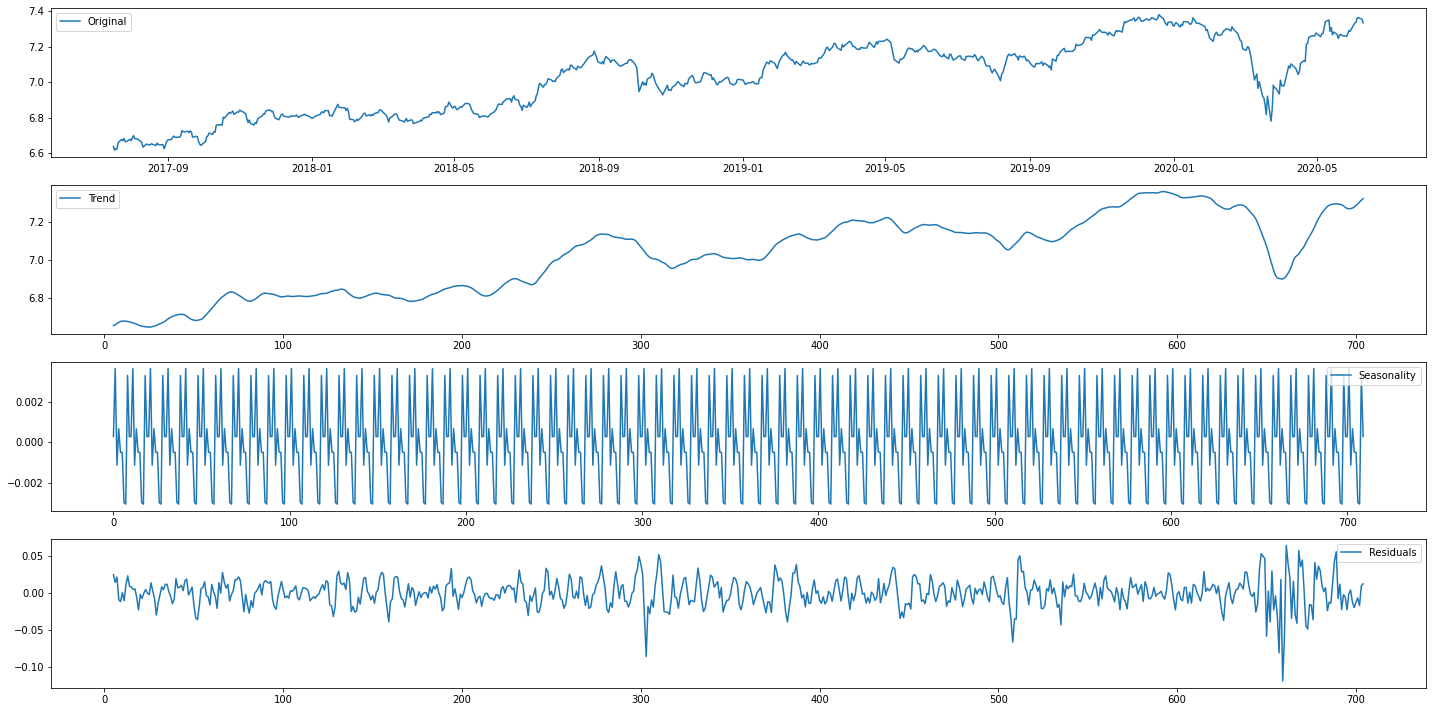

In [97]:
plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

The trend, residuals and the seasonality can be seen clearly in the above graph. Seasonality shows a constant trend in counter.

It can be interpreted from the results that the residuals are stationary.


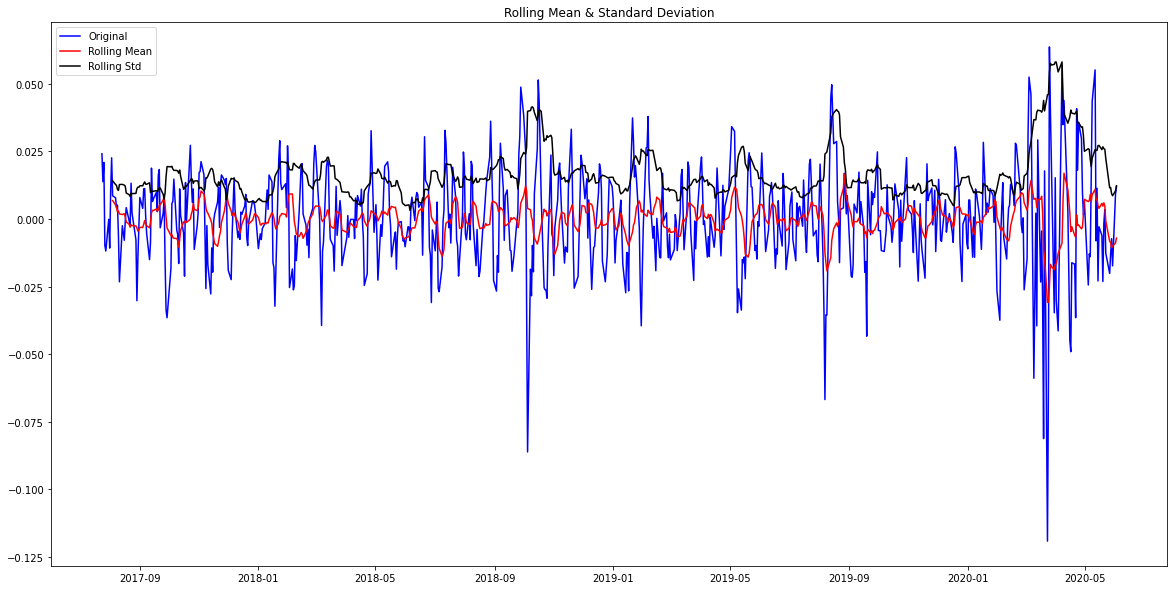

Results of Dickey-Fuller Test:
Test Statistic                -8.976118e+00
p-value                        7.524141e-15
#Lags Used                     2.000000e+01
Number of Observations Used    6.790000e+02
Critical Value (1%)           -3.440017e+00
Critical Value (5%)           -2.865806e+00
Critical Value (10%)          -2.569042e+00
dtype: float64


In [98]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

ARIMA model is fitted on the time series for which the optimized values for the p,d,q parameters is to be found.
To find the optimized values of these parameters, ACF(Autocorrelation Function) and PACF(Partial Autocorrelation Function) graph is used.

ACF is a measure of the correlation between the TimeSeries with a lagged version of itself.

PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.


In [88]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=30) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=30, method='ols')

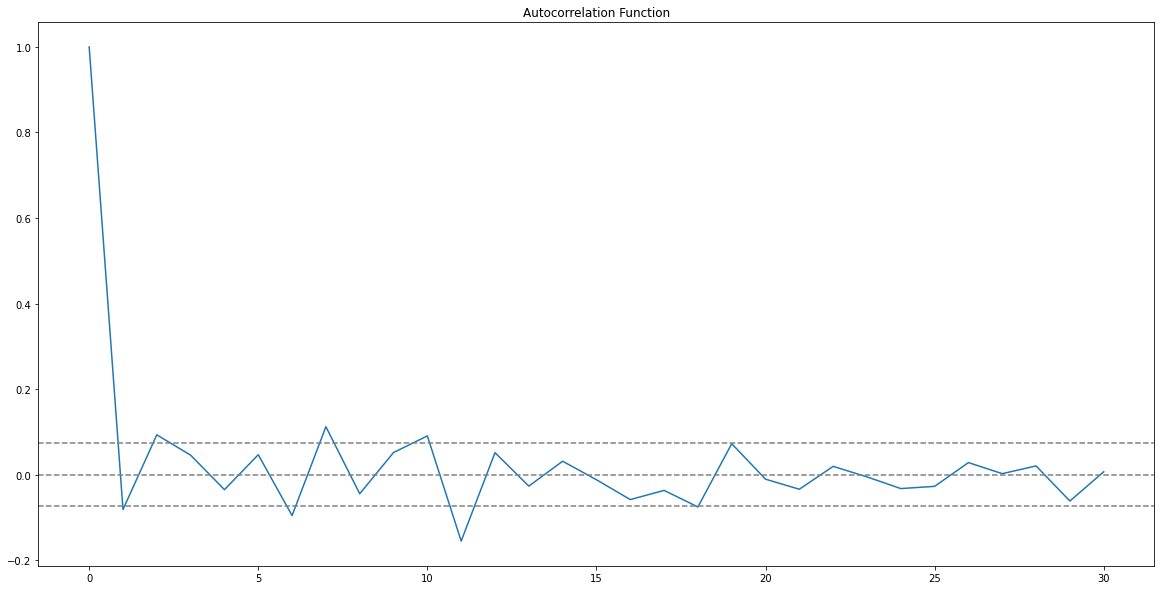

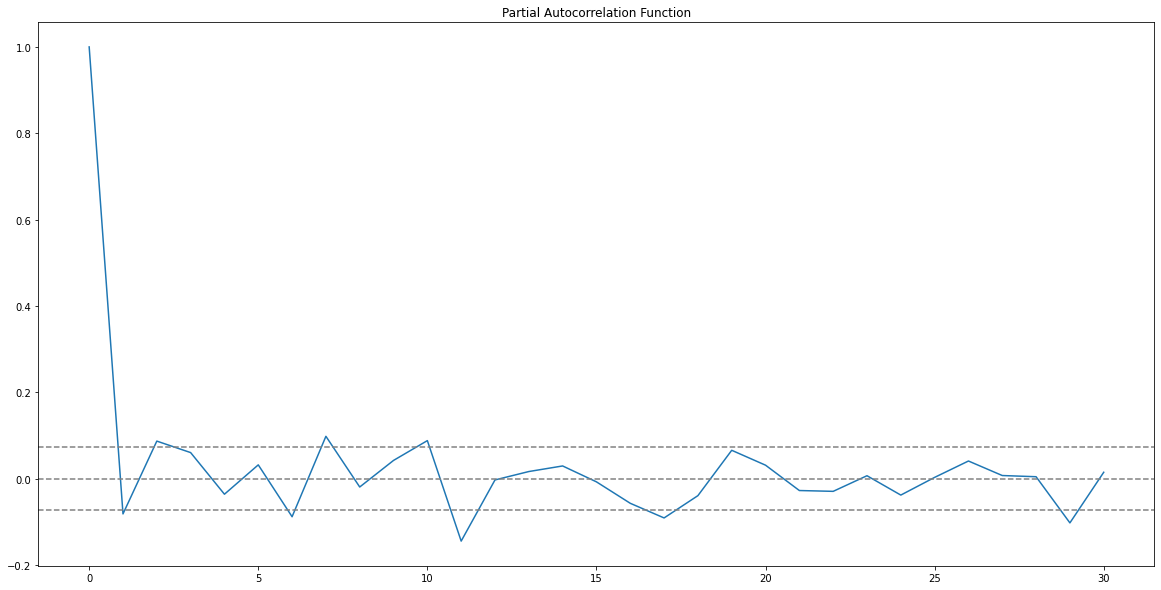

In [89]:
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()


ARIMA stands for Auto Regression Integrated Moving Average. It is specified by three ordered parameters (p,d,q).

Here p is the order of the autoregressive model(number of time lags) d is the degree of differencing(number of times the data have had past values subtracted) q is the order of moving average model. We will discuss more about these parameters in next section.

/home/deeplearner/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/deeplearner/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


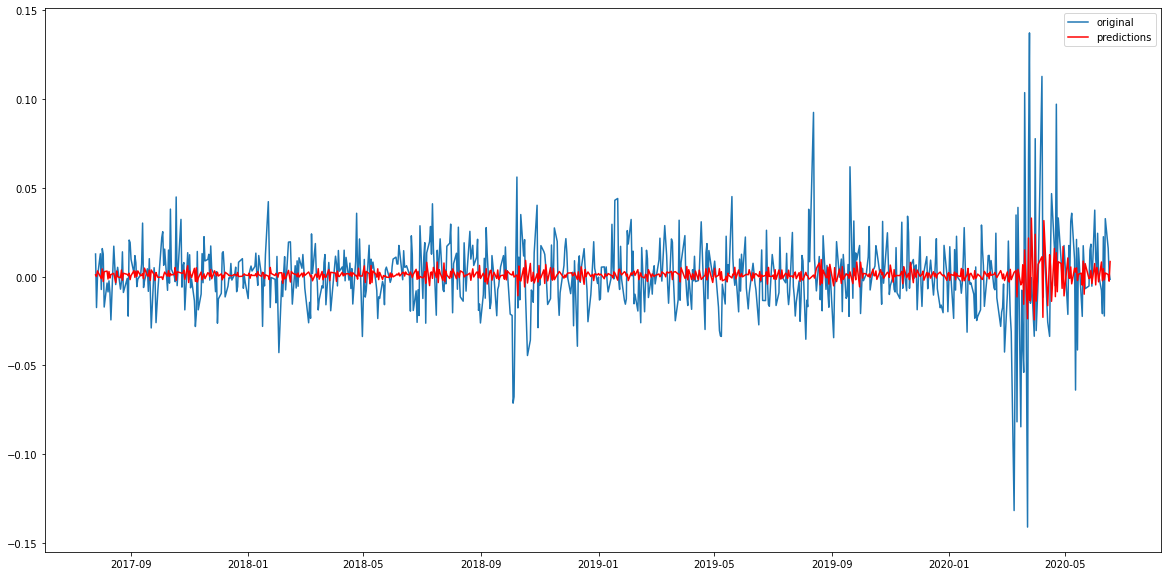

In [93]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log, order=(3, 1, 3))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()

In [94]:
results_AR = model.fit(disp=-1)  
results_AR

In [95]:
# AR_predict=results_AR.predict()
# AR_predict=AR_predict.cumsum().shift().fillna(0)
# AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid)[0], index = valid.index) 
# AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
# AR_predict = np.exp(AR_predict1)
# plt.plot(valid, label = "Valid") 
# plt.plot(AR_predict, color = 'red', label = "Predict") 
# plt.legend(loc= 'best') 
# plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid))/valid.shape[0])) 
# plt.show()

In [98]:
model = ARIMA(train, order=(3, 1, 3))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

/home/deeplearner/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/deeplearner/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                  709
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3258.906
Method:                       css-mle   S.D. of innovations             23.984
Date:                Sat, 25 Jul 2020   AIC                           6533.812
Time:                        10:24:12   BIC                           6570.323
Sample:                             1   HQIC                          6547.917
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.1553      1.021      1.132      0.258      -0.846       3.156
ar.L1.D.Adj Close    -0.9028      0.207     -4.356      0.000      -1.309      -0.497
ar.L2.D.Adj Close     0.

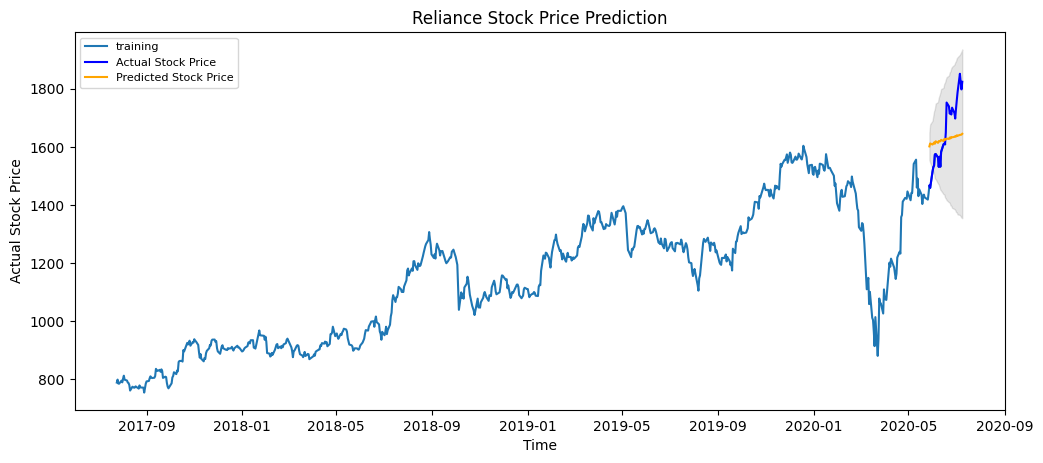

In [99]:
fc, se, conf = fitted.forecast(31, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=valid.index)
lower_series = pd.Series(conf[:, 0], index=valid.index)
upper_series = pd.Series(conf[:, 1], index=valid.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(valid, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The above graph represents the variation between actual prce and predicted stock price.

In [100]:
from math import sqrt
import math
from sklearn.metrics import mean_absolute_error
# report performance
mse = mean_squared_error(valid, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(valid, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(valid, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - valid)/np.abs(valid))
print('MAPE: '+str(mape))

MSE: 10964.365690769386
MAE: 91.3996007342067
RMSE: 104.71086710924223
MAPE: 0.054555642429980046


In [101]:
from math import sqrt
from sklearn.metrics import mean_squared_error


In [102]:
rms = sqrt(mean_squared_error(valid,fc))
print("RMSE: ", rms)

RMSE:  104.71086710924223
